# What to do?
 Sentiment analysis on Twitter data using machine learning algorithms.

# A gist of what i did...
1. import the necessary libraries.
2. used twitter API to extract tweets.
3. defined functions which clean the tweets, apply sentiment to the tweets. 
4. The user is asked to enter the keyword of tweets and number of tweets.
5. stored the tweets in tweet list. 
6. stored positive, negative, neutral tweets in separate lists.
7. next, i converted these lists into separate dataframes.
8. plotted a pie chart for the tweets depending on their sentiments.
9. now our tweets dataframe conatins tweet and a sentiment as separate columns.
10. added positive, neutral, negative, compound scores of each tweet as sperate columns in dataframe.
11. created a function for word cloud and displayed the word cloud of all tweets, positive tweets, negative tweets, neutral tweets.
12. added polarity and subjectivity for each tweets as separate column names in dataframe.
13. added word count and tweet length for each tweet as columns.
14. next i removed punctuations from tweets, removed stopwords, tokenized them and stemmed them and made separate columns for each in the dataframe.
15. next, i cleaned the tweets and applied Countvectorizer on these cleaned tweets.
16. made a separate dataframe for these count vectorized tweets and displayed the most used words.
17. made a function to convert the tweets to n-gram. 
18. displayed the bi-grams and tri-grams of tweets on screen.
19. next, separated the training and testing data and applied sentiment analysis on logistic regression. Displayed the classification report for the same.

# Let's dive into the code...

In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# keys and tokens from twitter console
ck = "DOkIaIaN0QoJE3bMIgTeBCwW8"  #consumer key
cs = "J1BmeuskkpeUgO4zsDkzagCkktp47NTE43saderPQHEnhcZtP2"  #consumer secret
at = "1394209714762698753-L1EsI0Vd52ZGimYvaI3eWp6QV3mCBx"  #access token
ats = "kWTX8AxHPjftLBlrdu9PgfJQLzjjdHFu7Ir15c53vOnso" #access token secret
# trying to authenticate
try:
    # creating OAuthHandler object
    auth = OAuthHandler(ck, cs)
    # using this object to access tokens
    auth.set_access_token(at, ats)
    #creating tweepy object to fetch tweets
    api = tweepy.API(auth)
except:
    print("Error!! Authentication Failed.")
def cleaning_tweets(tweet):
    # helper function for cleaning tweets by removing the special characters and links
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def senti(tweet):
    # helper function to classify sentiment of tweet
    #creating textblob object
    anal = TextBlob(cleaning_tweets(tweet))
    #classifying sentiment
    if anal.sentiment.polarity > 0:
        return "positive tweet!"
    elif anal.sentiment.polarity == 0:
        return "neutral tweet!"
    else:
        return "negative tweet!"
def get_tweets(query, count):
    #main function to fetch tweets and parse them
    tweets = []  #empty list to store the tweets
    try:
        #calling a twitter api to fetch tweets
        #fetchtweets = api.search(q = query, count = count)
        fetchtweets = tweepy.Cursor(api.search, q= query).items(count)
        #parsing tweets one at a time
        for tweet in fetchtweets:
            parsetweet = {} #dictionary to store parsed tweets
                    
            parsetweet['text'] = tweet.text #saving text of tweet
            parsetweet['sentiment'] = senti(tweet.text)  #saving sentiment of tweet
            # checking for retweet counts
            if tweet.retweet_count > 0:
                # ensuring that a tweet which has retweets is appended only once in the list
                if parsetweet not in tweets:
                    tweets.append(parsetweet)
                else:
                    tweets.append(parsetweet)
        return tweets
    except tweepy.TweepError as e:
        print("Error:"+ str(e))  #printing error

In [3]:
keyword = input("enter the hashtag you want to search: ")
noOftweets = int(input("enter the number of tweets: "))
tweets = get_tweets(query = keyword, count = noOftweets)
print(tweets[:10])  #printing first ten tweets
    
ptweets=[]
for t in tweets:
    if t['sentiment'] == "positive tweet!":
        ptweets.append(t['text'])
#% of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
#for negative tweets
ntweets = [t['text'] for t in tweets if t['sentiment'] == 'negative tweet!']
#% of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
#% of neural tweets
print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) 
                                                          -(len( ntweets )+len( ptweets)))/len(tweets)))
nuetweets = [t['text'] for t in tweets if t['sentiment'] == 'neutral tweet!']
# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:10]:
    print(tweet)
  
#printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
    print(tweet)

enter the hashtag you want to search: india
enter the number of tweets: 1500
[{'text': 'RT @ronaldo_mb_dhf: Trending India Wide at 4th Position 🔥\n\n#DontMessWithSSMBFans https://t.co/bAflcfPSQo', 'sentiment': 'negative tweet!'}, {'text': "RT @Khushi4justice: Why did Rhea take Sushant's laptop and hard disks with her when she left him on 8th June 2020? What data was there in t…", 'sentiment': 'negative tweet!'}, {'text': 'RT @AnujKum81789330: @vas88m @1stIndiaNews @ombirlakota @RaghusharmaINC @MoHFW_INDIA @ashokgehlot51 @zeerajasthan_ @NHMnurses2016 Ghalot sa…', 'sentiment': 'neutral tweet!'}, {'text': 'RT @SayCoolEnglish: โอ้โห ตอนนี้ที่เวียดนามตรวจพบไวรัสสายพันธุ์ผสม (hybrid covid-19 variant s) ระหว่างสายพันธุ์อินเดียกับอังกฤษ พบว่าสายพัน…', 'sentiment': 'neutral tweet!'}, {'text': 'RT @SuvenduWB: Today is a dark day in India’s long-standing ethos of cooperative federalism, a principle held sacred by PM @narendramodi.…', 'sentiment': 'negative tweet!'}, {'text': 'RT @exobsocial50: To

In [4]:
#convert lists to dataframe
tweets = pd.DataFrame(tweets)
ptweets = pd.DataFrame(ptweets)
ntweets = pd.DataFrame(ntweets)
nuetweets = pd.DataFrame(nuetweets)
print("total number: ", len(tweets))
print("positive tweets: ", len(ptweets))
print("negative tweets: ", len(ntweets))
print("neutral tweets: ", len(nuetweets))

total number:  1233
positive tweets:  377
negative tweets:  157
neutral tweets:  699


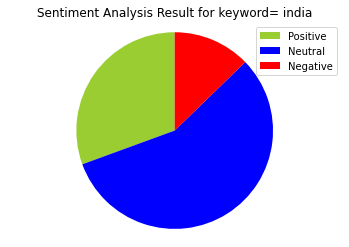

In [5]:
#creating piecharts
labels = ['Positive', 'Neutral', 'Negative' ]
sizes = [len(ptweets), len(nuetweets), len(ntweets)]
colors = ['yellowgreen','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [6]:
tweets.head()

,text,sentiment
0,RT @ronaldo_mb_dhf: Trending India Wide at 4th...,negative tweet!
1,RT @Khushi4justice: Why did Rhea take Sushant'...,negative tweet!
2,RT @AnujKum81789330: @vas88m @1stIndiaNews @om...,neutral tweet!
3,RT @SayCoolEnglish: โอ้โห ตอนนี้ที่เวียดนามตรว...,neutral tweet!
4,RT @SuvenduWB: Today is a dark day in India’s ...,negative tweet!


In [7]:
tweets.isnull().sum() # check for null values

text         0
sentiment    0
dtype: int64

In [8]:
ptweets.head()

,0
0,RT @exobsocial50: Top Countries tagging #DONT_...
1,RT @Satirical_Dhruv: Petrol price hike is the ...
2,RT @Jairam_Ramesh: He could have worked anywhe...
3,RT @MdToush0786: India's farmers know that giv...
4,RT @exobsocial50: Top Countries tagging #DONT_...


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
#adding positive, negative, neutral, compound scores to dataframe
for i, row in tweets['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    tweets.loc[i, 'neg'] = neg
    tweets.loc[i, 'neu'] = neu
    tweets.loc[i, 'pos'] = pos
    tweets.loc[i, 'compound'] = comp
    
tweets.head()

,text,sentiment,neg,neu,pos,compound
0,RT @ronaldo_mb_dhf: Trending India Wide at 4th...,negative tweet!,0.000,1.000,0.0,0.0000
1,RT @Khushi4justice: Why did Rhea take Sushant'...,negative tweet!,0.051,0.949,0.0,-0.1027
2,RT @AnujKum81789330: @vas88m @1stIndiaNews @om...,neutral tweet!,0.000,1.000,0.0,0.0000
3,RT @SayCoolEnglish: โอ้โห ตอนนี้ที่เวียดนามตรว...,neutral tweet!,0.000,1.000,0.0,0.0000
4,RT @SuvenduWB: Today is a dark day in India’s ...,negative tweet!,0.000,1.000,0.0,0.0000


In [11]:
#function to create wordcloud
def wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(width = 800, height = 800, background_color="white", max_words= 3000, 
                  stopwords= stopwords, repeat= True)
    wc.generate(str(text))
    #wc.to_file("wc.png")
    print("word cloud saved successfully!")
    #path = "wc.png"
    #display(Image.open(path))
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
  
    plt.show()

word cloud saved successfully!


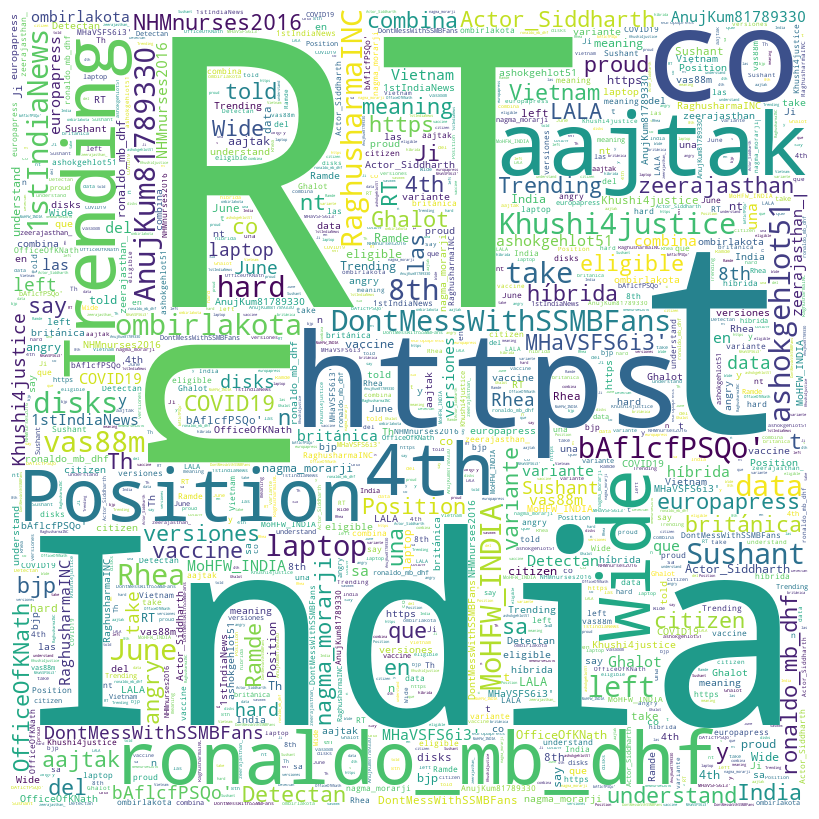

In [12]:
#Creating wordcloud for all tweets
wordcloud(tweets['text'].values)

word cloud saved successfully!


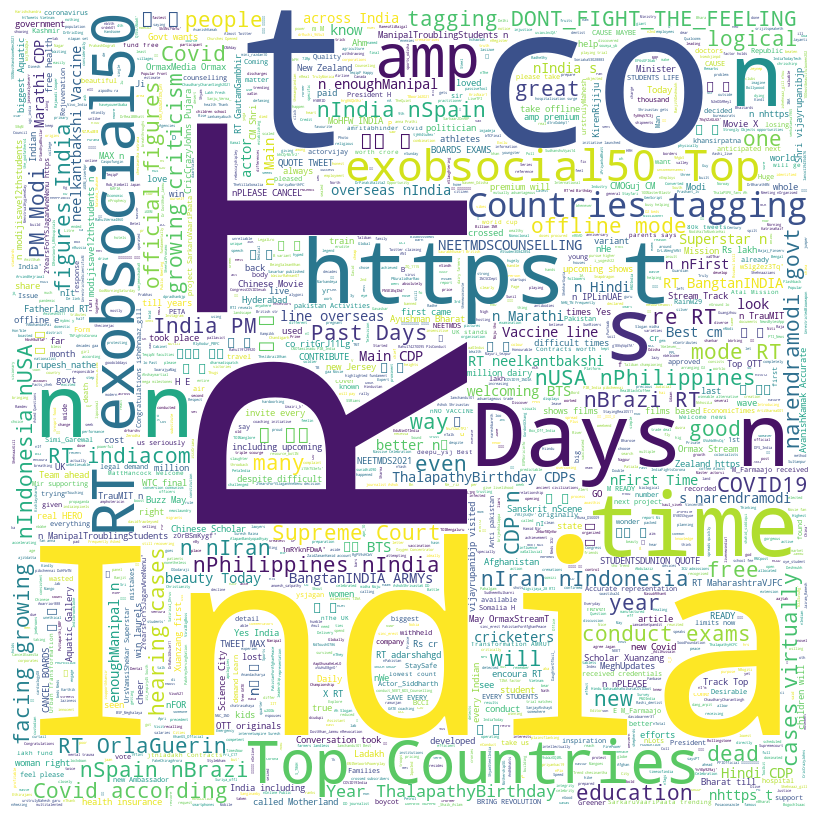

In [13]:
#creating wordcloud for tweets with positive sentiment
wordcloud(ptweets.values)

word cloud saved successfully!


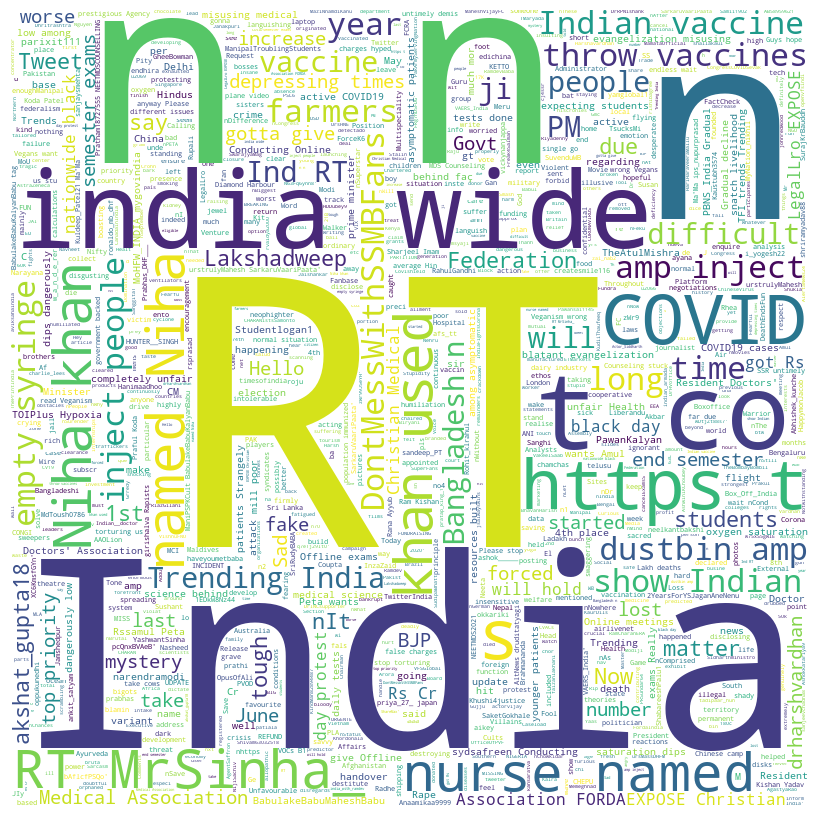

In [14]:
#creating wordcloud for tweets with negative sentiment
wordcloud(ntweets.values)

In [15]:
#adding polarity and subjectivity to the dataframe
tweets[['polarity', 'subjectivity']] = tweets['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [16]:
tweets.head(10)

,text,sentiment,neg,neu,pos,compound,polarity,subjectivity
0,RT @ronaldo_mb_dhf: Trending India Wide at 4th...,negative tweet!,0.000,1.000,0.000,0.0000,-0.100000,0.400000
1,RT @Khushi4justice: Why did Rhea take Sushant'...,negative tweet!,0.051,0.949,0.000,-0.1027,-0.145833,0.270833
2,RT @AnujKum81789330: @vas88m @1stIndiaNews @om...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000
3,RT @SayCoolEnglish: โอ้โห ตอนนี้ที่เวียดนามตรว...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000
4,RT @SuvenduWB: Today is a dark day in India’s ...,negative tweet!,0.000,1.000,0.000,0.0000,-0.150000,0.400000
5,RT @exobsocial50: Top Countries tagging #DONT_...,positive tweet!,0.000,0.909,0.091,0.2023,0.250000,0.416667
6,RT @Satirical_Dhruv: Petrol price hike is the ...,positive tweet!,0.000,0.843,0.157,0.3818,0.116667,0.750000
7,RT @btsyoutubedata: Butter song on YouTube — M...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000
8,RT @Jairam_Ramesh: He could have worked anywhe...,positive tweet!,0.000,0.857,0.143,0.5927,0.136364,0.500000
9,RT @danielfinney51: Trending No1 inap and no5 ...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000


In [17]:
#calculating word count and tweet length
tweets['text_length'] = tweets['text'].astype(str).apply(len)
tweets['word_count'] = tweets['text'].apply(lambda x: len(str(x).split()))
tweets.groupby("sentiment").text_length.mean()

sentiment
negative tweet!    136.624204
neutral tweet!     130.363376
positive tweet!    135.050398
Name: text_length, dtype: float64

In [18]:
tweets.groupby("sentiment").word_count.mean()

sentiment
negative tweet!    21.203822
neutral tweet!     17.779685
positive tweet!    20.665782
Name: word_count, dtype: float64

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tweets['punct'] = tweets['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tweets['tokenized'] = tweets['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets['nonstop'] = tweets['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tweets['stemmed'] = tweets['nonstop'].apply(lambda x: stemming(x))

In [21]:
tweets.tail(10)

,text,sentiment,neg,neu,pos,compound,polarity,subjectivity,text_length,word_count,punct,tokenized,nonstop,stemmed
1223,RT @MaharashtraVJFC: This Year #ThalapathyBirt...,positive tweet!,0.000,1.000,0.000,0.0000,0.208333,0.333333,138,22,RT MaharashtraVJFC This Year ThalapathyBirthda...,"[rt, maharashtravjfc, this, year, thalapathybi...","[rt, maharashtravjfc, year, thalapathybirthday...","[rt, maharashtravjfc, year, thalapathybirthday..."
1224,RT @SayCoolEnglish: โอ้โห ตอนนี้ที่เวียดนามตรว...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000,140,10,RT SayCoolEnglish โอ้โห ตอนนี้ที่เวียดนามตรวจพ...,"[rt, saycoolenglish, โอ, โห, ตอนน, ท, เว, ยดนา...","[rt, saycoolenglish, โอ, โห, ตอนน, ท, เว, ยดนา...","[rt, saycoolenglish, โอ, โห, ตอนน, ท, เว, ยดนา..."
1225,RT @CMOGuj: CM Shri @vijayrupanibjp visited In...,positive tweet!,0.000,1.000,0.000,0.0000,0.100000,0.300000,140,22,RT CMOGuj CM Shri vijayrupanibjp visited India...,"[rt, cmoguj, cm, shri, vijayrupanibjp, visited...","[rt, cmoguj, cm, shri, vijayrupanibjp, visited...","[rt, cmoguj, cm, shri, vijayrupanibjp, visit, ..."
1226,RT @HansrajMeena: India. Heartbreaking.\n#Modi...,neutral tweet!,0.429,0.571,0.000,-0.4588,0.000000,0.000000,51,5,RT HansrajMeena India Heartbreaking\nModiResign,"[rt, hansrajmeena, india, heartbreaking, modir...","[rt, hansrajmeena, india, heartbreaking, modir...","[rt, hansrajmeena, india, heartbreak, modiresign]"
1227,RT @DrSubhasree: A knowledge map on different ...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.600000,140,21,RT DrSubhasree A knowledge map on different Ma...,"[rt, drsubhasree, a, knowledge, map, on, diffe...","[rt, drsubhasree, knowledge, map, different, m...","[rt, drsubhasre, knowledg, map, differ, mango,..."
1228,RT @Kiran_reddy7777: Trending in 5th place (In...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000,111,15,RT Kiranreddy7777 Trending in 5th place India\...,"[rt, kiranreddy7777, trending, in, 5th, place,...","[rt, kiranreddy7777, trending, 5th, place, ind...","[rt, kiranreddy7777, trend, 5th, place, india,..."
1229,RT @MrJamesCosmo: I need your help! ..... to s...,neutral tweet!,0.000,0.857,0.143,0.4574,0.000000,0.000000,139,20,RT MrJamesCosmo I need your help to spread th...,"[rt, mrjamescosmo, i, need, your, help, to, sp...","[rt, mrjamescosmo, need, help, spread, word, j...","[rt, mrjamescosmo, need, help, spread, word, j..."
1230,RT @europapress: Detectan en Vietnam una varia...,neutral tweet!,0.000,1.000,0.000,0.0000,0.000000,0.000000,138,18,RT europapress Detectan en Vietnam una variant...,"[rt, europapress, detectan, en, vietnam, una, ...","[rt, europapress, detectan, en, vietnam, una, ...","[rt, europapress, detectan, en, vietnam, una, ..."
1231,RT @Actor_Siddharth: If you are a citizen of I...,negative tweet!,0.117,0.883,0.000,-0.5106,-0.500000,1.000000,140,28,RT ActorSiddharth If you are a citizen of Indi...,"[rt, actorsiddharth, if, you, are, a, citizen,...","[rt, actorsiddharth, citizen, india, told, eli...","[rt, actorsiddharth, citizen, india, told, eli..."
1232,RT @nagma_morarji: . @aajtak does nt understan...,positive tweet!,0.000,0.876,0.124,0.4767,0.800000,1.000000,140,24,RT nagmamorarji aajtak does nt understand wha...,"[rt, nagmamorarji, aajtak, does, nt, understan...","[rt, nagmamorarji, aajtak, nt, understand, off...","[rt, nagmamorarji, aajtak, nt, understand, off..."


In [22]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [23]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweets['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

1233 Number of reviews has 4305 words


In [24]:
print(countVectorizer.get_feature_names())

['', 'aaa', 'aabidmagami', 'aajtak', 'aakarpatel', 'aaolion', 'aapdelhi', 'aapghumakelel', 'aashil', 'ab', 'abbasjizzin', 'abdulaziz', 'abhi', 'abhiandniyu', 'abhinandan', 'abhishekkunch', 'abl', 'abpmajhatv', 'abpnew', 'abroad', 'absenc', 'absentcm', 'absolut', 'abus', 'abvpkarnataka', 'abvpvoic', 'acarzeyno', 'acc', 'acceler', 'access', 'accord', 'account', 'accur', 'acet', 'achi', 'achiev', 'achunadia', 'achyutasamanta', 'acid', 'acquir', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actorsiddharth', 'actorvi', 'actorvijay', 'actual', 'adalah', 'adani', 'adaniambani', 'adarn', 'adarshahgd', 'adarshl', 'add', 'addit', 'address', 'addu', 'adeshguptabjp', 'adesivado', 'adigulshan', 'adilhussain', 'aditichourasia', 'aditya', 'administr', 'admiss', 'advantag', 'advertis', 'advis', 'advmamtasharma', 'advoc', 'af', 'affair', 'affairsgovt', 'affidavit', 'afghan', 'afghanistan', 'africa', 'afstt', 'aft', 'ag', 'agastyarao', 'age', 'agenc', 'agentsaffron', 'agre', 'agricultur', 'a

In [25]:
cv_df = pd.DataFrame(countVector.toarray(), columns= countVectorizer.get_feature_names())
cv_df.head(10)

,,aaa,aabidmagami,aajtak,aakarpatel,aaolion,aapdelhi,aapghumakelel,aashil,ab,...,โห,โอ,詳報,방탄소년단,𝗝𝘂𝘀𝘁𝗶𝗰𝗲,𝗣𝗮𝗹𝗲𝘀𝘁𝗶𝗻𝗲,𝗣𝗲𝗮𝗰𝗲,𝗥𝗼𝗮𝗱,𝗮𝗻𝗱,𝘁𝗼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#most used words
count = pd.DataFrame(cv_df.sum())
countdf = count.sort_values(0, ascending = False).head(20)
countdf[1:20]

,0
,987
india,683
क,238
र,137
covid,125
amp,115
न,106
म,100
trend,87
ल,78


In [27]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]

In [28]:
#bigrams
bigram = get_top_n_gram(tweets['text'], (2,2), 20)
bigram

[('trending india', 51),
 ('covid 19', 40),
 ('manipaltroublingstudents enoughmahe', 26),
 ('prime minister', 25),
 ('traumit heartlessmahe', 24),
 ('boycottendsems enoughmahe', 24),
 ('2yearsforysjagananenenu https', 23),
 ('enoughmahe traumit', 23),
 ('enoughmanipal boycottendsems', 22),
 ('master actorvijay', 21),
 ('south india', 21),
 ('heartlessmahe enoughmanipal', 21),
 ('rt exobsocial50', 20),
 ('exobsocial50 countries', 20),
 ('countries tagging', 20),
 ('tagging dont_fight_the_feeling', 20),
 ('dont_fight_the_feeling past', 20),
 ('past days', 20),
 ('days iran', 20),
 ('iran indonesia', 20)]

In [29]:
#trigram
trigram = get_top_n_gram(tweets['text'], (3,3), 20)

In [30]:
trigram

[('manipaltroublingstudents enoughmahe traumit', 23),
 ('enoughmahe traumit heartlessmahe', 23),
 ('traumit heartlessmahe enoughmanipal', 21),
 ('heartlessmahe enoughmanipal boycottendsems', 21),
 ('enoughmanipal boycottendsems enoughmahe', 21),
 ('rt exobsocial50 countries', 20),
 ('exobsocial50 countries tagging', 20),
 ('countries tagging dont_fight_the_feeling', 20),
 ('tagging dont_fight_the_feeling past', 20),
 ('dont_fight_the_feeling past days', 20),
 ('past days iran', 20),
 ('days iran indonesia', 20),
 ('iran indonesia usa', 20),
 ('indonesia usa philippines', 20),
 ('usa philippines india', 20),
 ('philippines india spain', 20),
 ('india spain brazi', 20),
 ('rt mrjamescosmo need', 20),
 ('mrjamescosmo need help', 20),
 ('need help spread', 20)]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [54]:
X, y = cv_df.iloc[:, :-1].values, cv_df.iloc[:, -1].values
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [38]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Report:\n{}'.format(classification_report(y_test, y_pred)))
    print('Score: {}'.format(model.score(X_test, y_test)))

In [55]:
#applying sentiment analysis on logistic regression
lr = LogisticRegression()
run_model(lr, X_train=X_train_std, y_train=y_train, X_test=X_test_std, y_test=y_test)

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

Score: 1.0
